<a href="https://colab.research.google.com/github/sam19980822/3rd-ML100Days/blob/master/Day078_CheckBeforeTrain_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers


Using TensorFlow backend.


In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333) 這行沒用，要改成以下兩行才可跑
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
## 資料前處理ape
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
x_train.shape

(50000, 3072)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 6s 129us/step - loss: 1.9243 - acc: 0.3044 - val_loss: 1.7533 - val_acc: 0.3753
Epoch 2/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.6991 - acc: 0.3907 - val_loss: 1.6267 - val_acc: 0.4184
Epoch 3/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.6052 - acc: 0.4285 - val_loss: 1.5625 - val_acc: 0.4386
Epoch 4/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.5513 - acc: 0.4473 - val_loss: 1.5364 - val_acc: 0.4485
Epoch 5/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5000 - acc: 0.4659 - val_loss: 1.5217 - val_acc: 0.4492
Epoch 6/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.4615 - acc: 0.4793 - val_loss: 1.5372 - val_acc: 0.4506
Epoch 7/100
50000/5

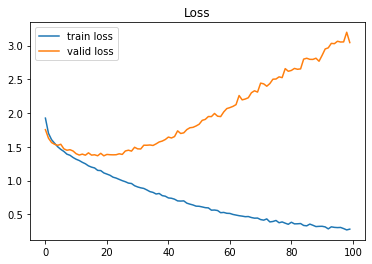

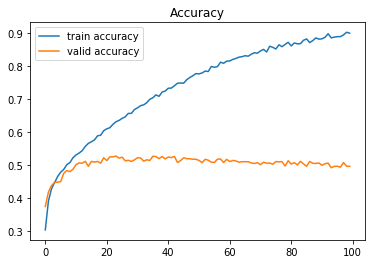

In [11]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理ape
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
  scaler = MinMaxScaler() 
  x = x.reshape((len(x), -1))
  x = scaler.fit_transform(x) #將每筆資料做minmax standardization
  return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[4096,2048,1024,512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [40]:
model2 = build_mlp(input_shape=x_train.shape[1:])
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 4096)              12587008  
_________________________________________________________________
hidden_layer2 (Dense)        (None, 2048)              8390656   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer4 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               3289

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [43]:
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 220us/step - loss: 2.0856 - acc: 0.2380 - val_loss: 1.8485 - val_acc: 0.3250
Epoch 2/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.7657 - acc: 0.3591 - val_loss: 1.7569 - val_acc: 0.3668
Epoch 3/100
50000/50000 [==============================] - 10s 196us/step - loss: 1.6683 - acc: 0.3989 - val_loss: 1.6297 - val_acc: 0.4142
Epoch 4/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.6050 - acc: 0.4221 - val_loss: 1.6117 - val_acc: 0.4282
Epoch 5/100
50000/50000 [==============================] - 10s 196us/step - loss: 1.5449 - acc: 0.4460 - val_loss: 1.5283 - val_acc: 0.4592
Epoch 6/100
50000/50000 [==============================] - 10s 196us/step - loss: 1.5049 - acc: 0.4599 - val_loss: 1.5287 - val_acc: 0.4538
Epoch 7/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.4551 - acc: 0.4764 - val_l

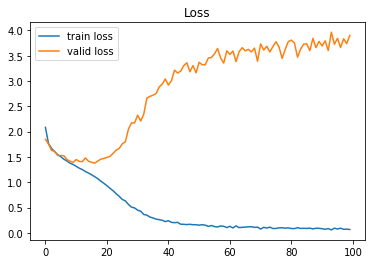

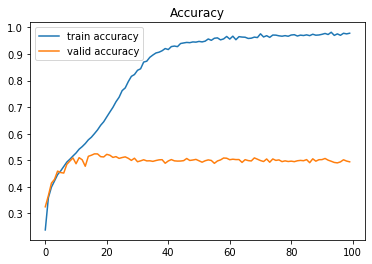

In [44]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Valid Loss 反而較高  
train accuracy 爬升較快